1. Linear Regression on House Prices
• Task: Predict house prices using area as a feature (1D Linear Regression).
• Visualize: Plot the data points and the best-fit regression line

Slope (Coefficient): 0.1
Intercept: 50.0


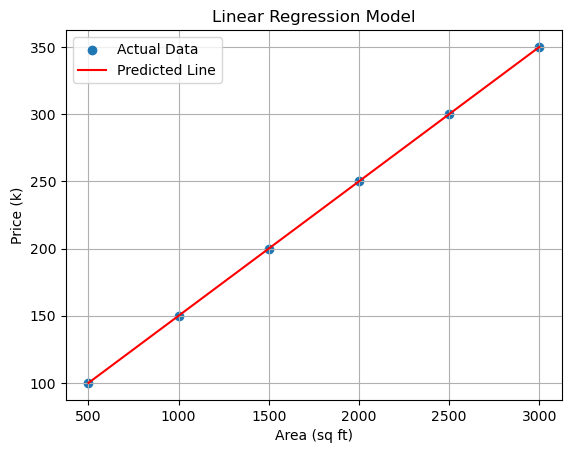

Predicted price for 1800 sq ft: 230.0


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data

# Area in square feet (reshaped to a 2D array for sklearn)
area = np.array([500, 1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)

# Corresponding prices in thousands (target variable)
price = np.array([100, 150, 200, 250, 300, 350])

# Step 2: Create and train the model

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data (learns the relationship between area and price)
model.fit(area, price)

# Step 3: Make predictions

# Predict prices based on the input areas
predict = model.predict(area)

# Print the learned model parameters (slope and intercept)
print("Slope (Coefficient):", model.coef_[0])     # How much price increases per unit area
print("Intercept:", model.intercept_)             # Price when area = 0

# Step 4: Visualize the results

# Plot the original data points
plt.scatter(area, price, label='Actual Data')

# Plot the regression line
plt.plot(area, predict, color='red', label='Predicted Line')

# Add labels and title
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (k)')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Predict for a new area

# Predict the price of a house with 1800 sq ft area
new_area = np.array([[1800]])
new_price = model.predict(new_area)
print("Predicted price for 1800 sq ft:", new_price[0])


2. Logistic Regression for Binary Classification
• Task: Classify points into two categories using logistic regression (e.g., pass/fail
based on hours studied).
• Visualize: Plot data points and decision boundary.

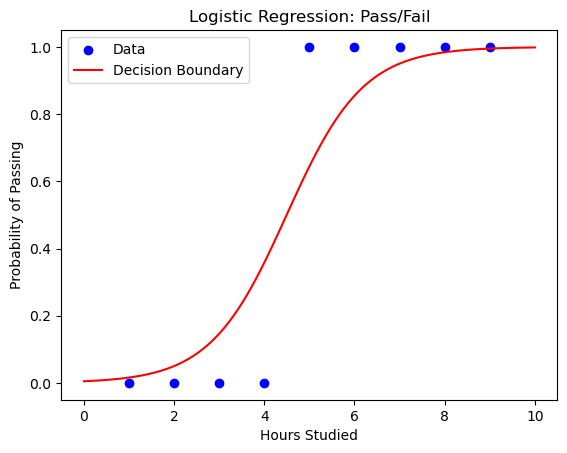

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Data: [hours studied], [pass=1/fail=0]
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

# Model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
x_test = np.linspace(0, 10, 100).reshape(-1, 1)   # 100 values between 0 and 10
y_prob = model.predict_proba(x_test)[:, 1]       # Probability of class 1 (pass)


# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(x_test, y_prob, color='red', label='Decision Boundary')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Pass/Fail')
plt.legend()
plt.show()


3. K-Nearest Neighbors (KNN) Classification
• Task: Use KNN to classify Iris flower species.
• Visualize: Use scatter plots with decision boundaries using different values of K.


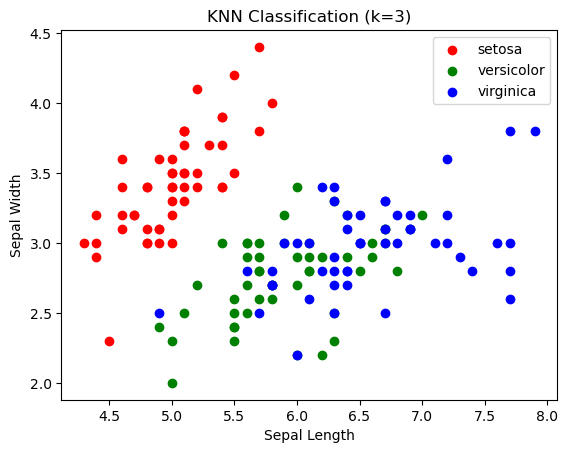

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first 2 features (sepal length and width)
y = iris.target

# Train KNN model (k=3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Plot data
for i, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=iris.target_names[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Classification (k=3)')
plt.legend()
plt.show()


4. K-Means Clustering
• Task: Apply K-means clustering to group customers by purchasing behavior.
• Visualize: Show clusters with different colors and cluster centroids.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


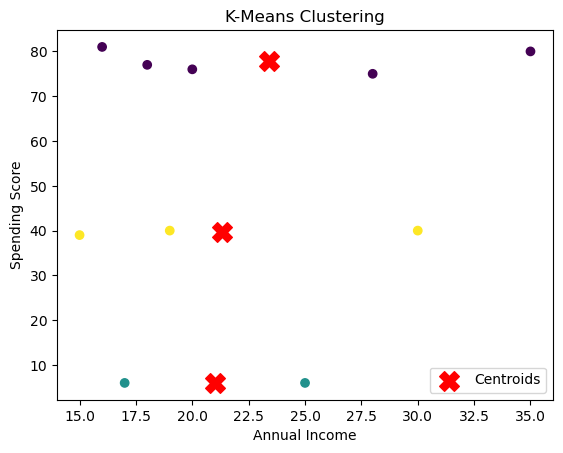

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data: [Annual Income, Spending Score]
X = np.array([[15, 39], [16, 81], [17, 6], [18, 77], [19, 40],
              [20, 76], [25, 6], [28, 75], [30, 40], [35, 80]])

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


5. Decision Tree Classification
• Task: Use a decision tree to classify animals (e.g., mammal/reptile based on
features).
• Visualize: Show the decision tree diagram and how decisions are made

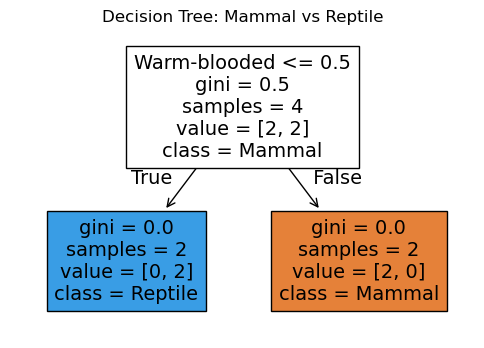

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: [Warm-blooded, Gives Birth]
X = [[1, 1], [1, 0], [0, 0], [0, 1]]
y = ['Mammal', 'Mammal', 'Reptile', 'Reptile']

# Model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# Plot tree
plt.figure(figsize=(6, 4))
tree.plot_tree(clf, feature_names=['Warm-blooded', 'Gives Birth'], 
               class_names=clf.classes_, filled=True)
plt.title('Decision Tree: Mammal vs Reptile')
plt.show()


6. Principal Component Analysis (PCA)
• Task: Apply PCA on a dataset with multiple features (e.g., handwritten digits).
• Visualize: Reduce to 2D and plot the data points to see separation of classes.

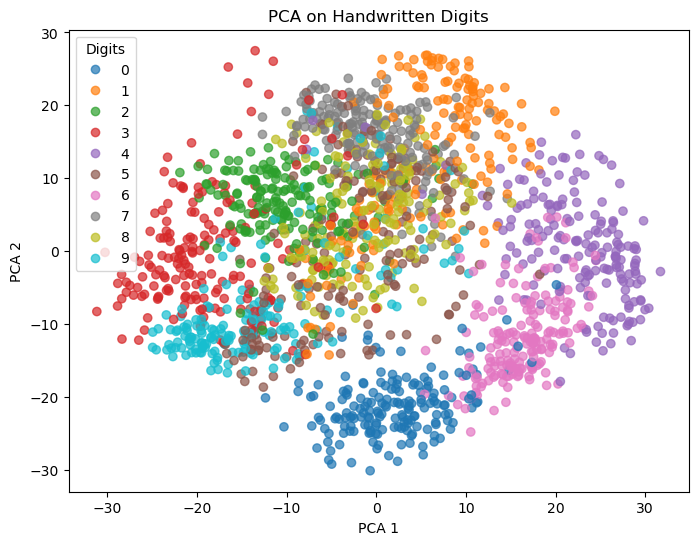

In [26]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA on Handwritten Digits')
plt.show()


7. Training a Simple Neural Network
• Task: Use a neural network to classify MNIST digits (only 1 or 2 hidden layers).
• Visualize: Accuracy/loss graphs over epochs, and confusion matrix.

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

Overfitting vs. Underfitting
• Task: Train polynomial regression models with varying degrees.
• Visualize: Compare training/validation errors and graph the fits.


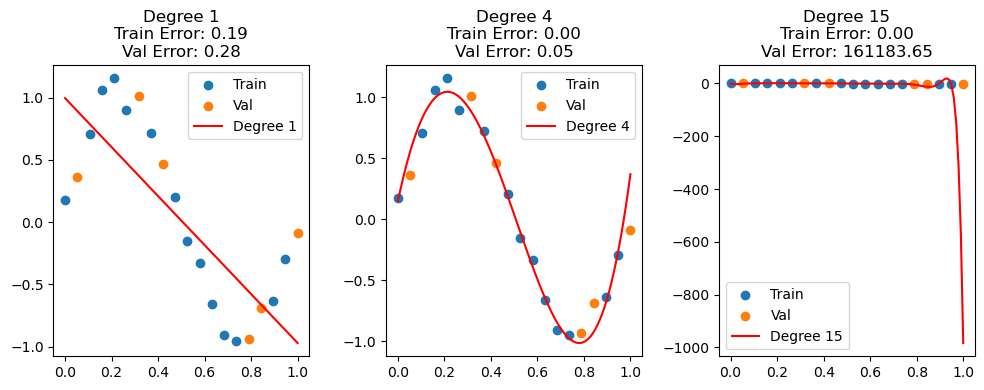

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate data
np.random.seed(0)
X = np.linspace(0, 1, 20)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, X.shape)
X = X.reshape(-1, 1)

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# Try different degrees
degrees = [1, 4, 15]
plt.figure(figsize=(10, 4))

for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    # Plot
    plt.subplot(1, 3, i+1)
    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.scatter(X_train, y_train, label='Train')
    plt.scatter(X_val, y_val, label='Val')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {d}')
    plt.title(f'Degree {d}\nTrain Error: {mean_squared_error(y_train, y_train_pred):.2f}\nVal Error: {mean_squared_error(y_val, y_val_pred):.2f}')
    plt.legend()

plt.tight_layout()
plt.show()


9. Convolutional Neural Network (CNN) on Fashion MNIST
• Task: Use a CNN to classify clothing images.
• Visualize: Feature maps (activation outputs) of the first convolutional layer.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models

# Load dataset
(x_train, y_train), _ = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_train = x_train[..., tf.newaxis]  # Add channel dimension

# Build CNN
model = models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train briefly
model.fit(x_train, y_train, epochs=1, batch_size=64, verbose=0)

# Create a model to output first conv layer activations
activation_model = models.Model(inputs=model.input, outputs=model.layers[0].output)

# Choose one image
img = x_train[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(img)

# Plot feature maps
plt.figure(figsize=(10, 4))
for i in range(8):  # 8 filters
    plt.subplot(1, 8, i+1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Feature Maps from First Conv Layer")
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

10.Image Augmentation Effects
• Task: Apply augmentation techniques (rotate, flip, zoom) on a small image dataset.
• Visualize: Show the original vs. augmented images to explain data diversity.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load one image from Fashion MNIST
(x_train, _), _ = tf.keras.datasets.fashion_mnist.load_data()
img = x_train[0].reshape(28, 28, 1) / 255.0  # Normalize and reshape

# Define augmentation pipeline
data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./1),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

# Apply augmentation multiple times
plt.figure(figsize=(10, 2))
for i in range(6):
    augmented = data_gen(img[np.newaxis, ...])[0]
    plt.subplot(1, 6, i+1)
    plt.imshow(augmented.numpy().squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Original & Augmented Images")
plt.tight_layout()
plt.show()
